In [1]:
import numpy as np
import scipy as sp
import os 
import sys
import importlib

In [2]:
util_path = 'C:/ASM/Dropbox/Developments/Jupyter/Eating/myutils' if 'C:' in os.getcwd() else './myutils'
sys.path.append(util_path)
import my_file_utils as mfileu
import my_data_process_utils as mdpu
#importlib.reload(mdu)

In [3]:
annots = mfileu.read_file('data', 'lab_annots_steven_right.pkl')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def get_episodes(a):
    a = a[a[:, 2]==1, 0]    
    clusters = []
    si = 0
    for i in range(1, len(a)):
        if a[i]-a[i-1]>5*16*60:
            clusters.append([a[si], a[i-1], i-si])
            si = i
        
    clusters.append([a[si], a[i-1], i-si])
    return np.array(clusters).astype(float)

Episode count:  3
[[  9.33958333  17.0625      19.        ]
 [168.49375    202.19166667  65.        ]
 [331.99270833 335.19166667  12.        ]]


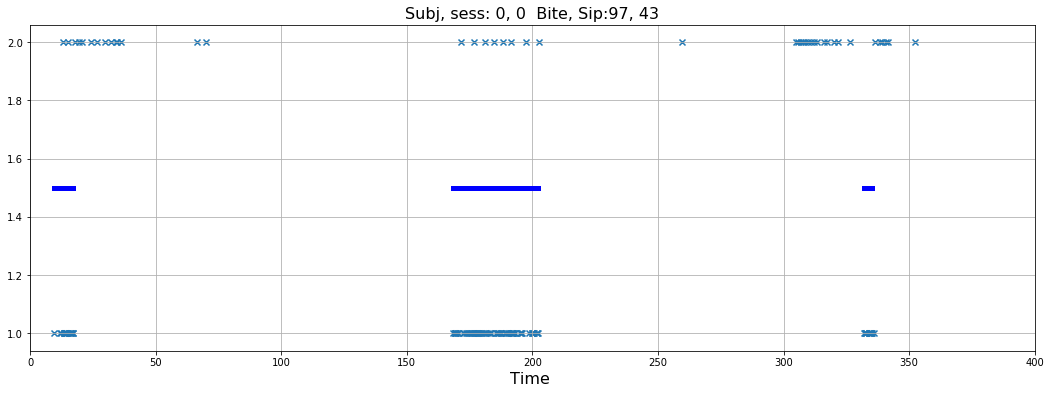

Episode count:  6
[[  7.7625      28.45833333  92.        ]
 [ 36.62291667  54.88333333  56.        ]
 [176.28229167 202.06354167  86.        ]
 [214.90729167 216.309375     2.        ]
 [227.82083333 234.94375     12.        ]
 [371.08541667 385.85208333  71.        ]]


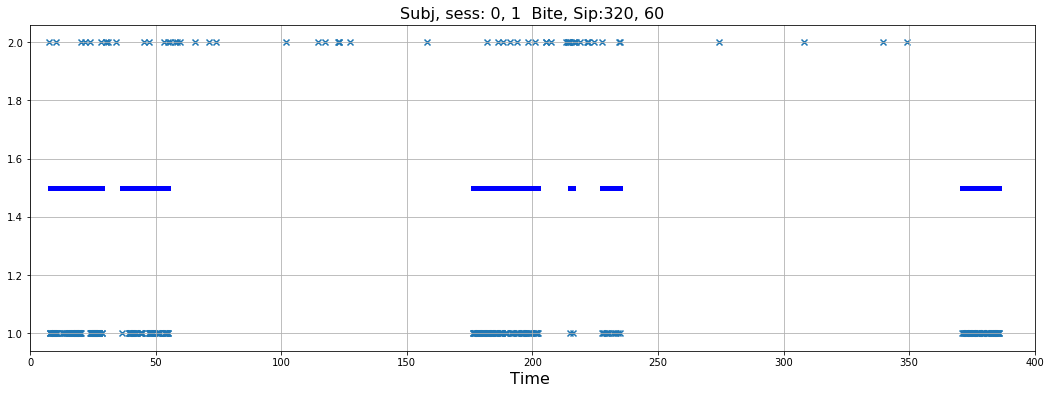

Episode count:  1
[[157.72083333 171.715625    31.        ]]


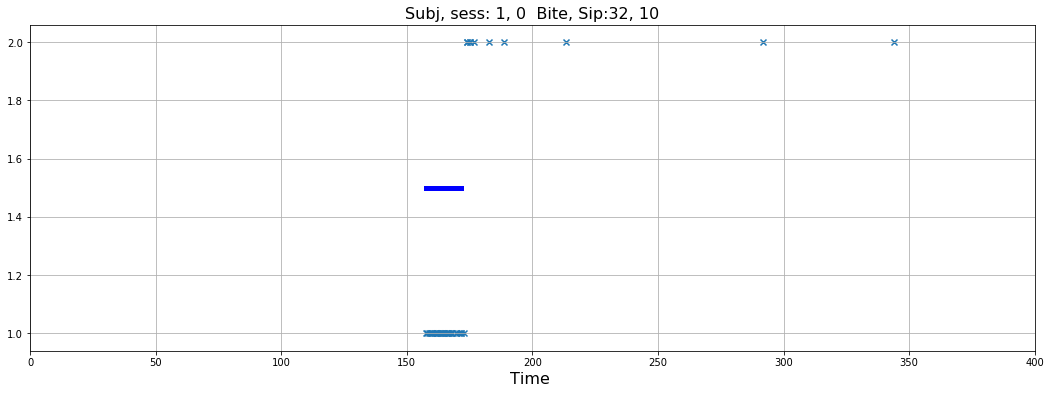

Episode count:  2
[[  9.4875      15.459375    32.        ]
 [169.85520833 186.21666667  99.        ]]


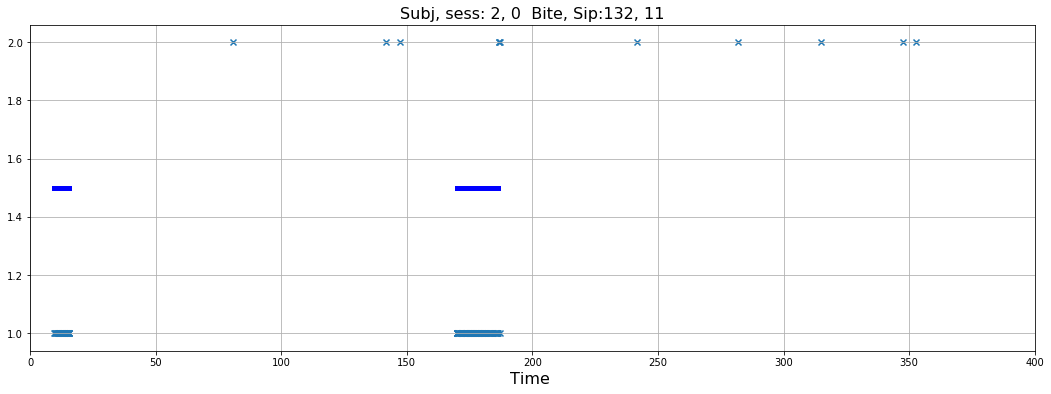

Episode count:  3
[[  5.18958333   8.7         23.        ]
 [100.68541667 100.68541667   1.        ]
 [337.06666667 338.54479167   8.        ]]


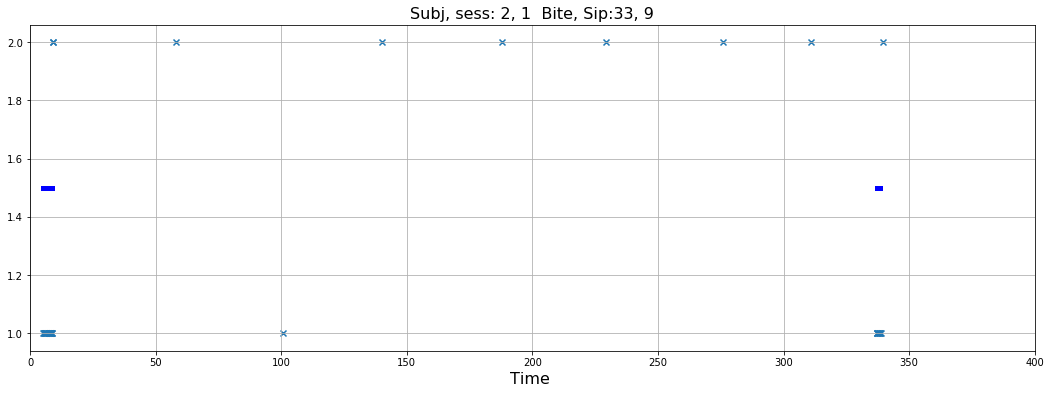

Episode count:  3
[[  5.87916667   6.61666667   2.        ]
 [ 15.746875    15.746875     1.        ]
 [145.49166667 162.875      102.        ]]


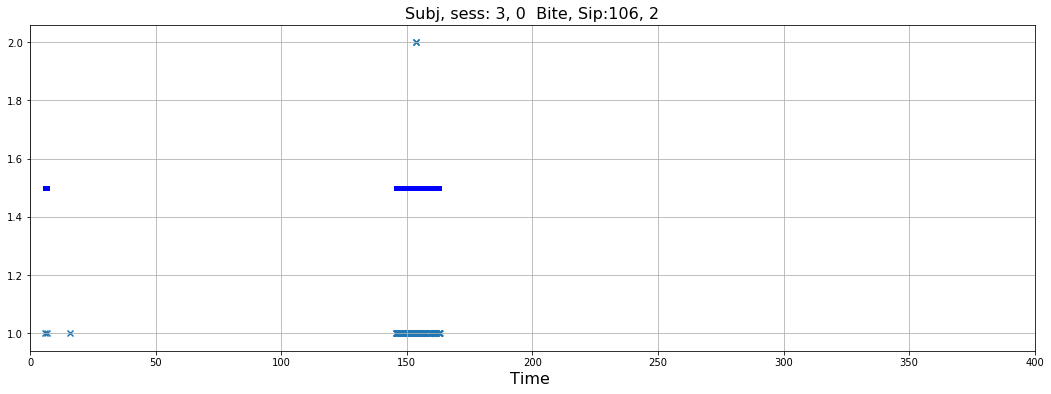

Episode count:  3
[[ 13.23333333  21.446875    23.        ]
 [131.41875    140.88020833  28.        ]
 [348.8625     357.6625      42.        ]]


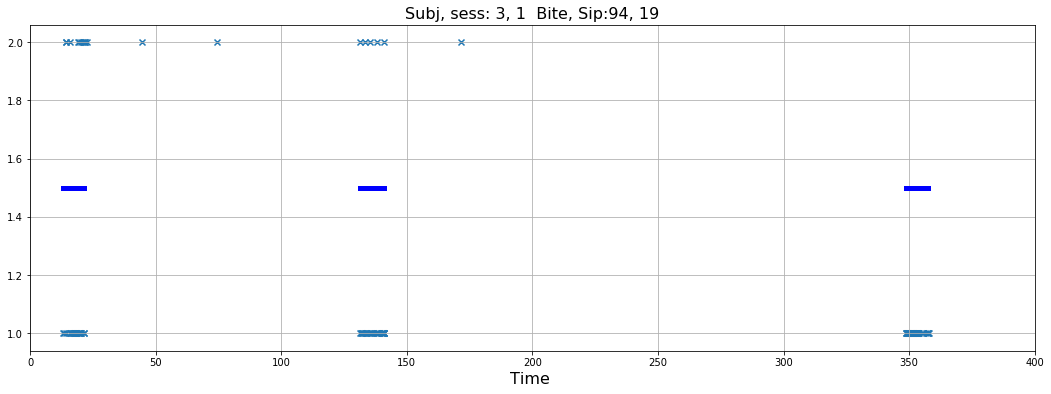

Episode count:  2
[[  3.76145833  11.240625    15.        ]
 [137.8125     160.03229167 146.        ]]


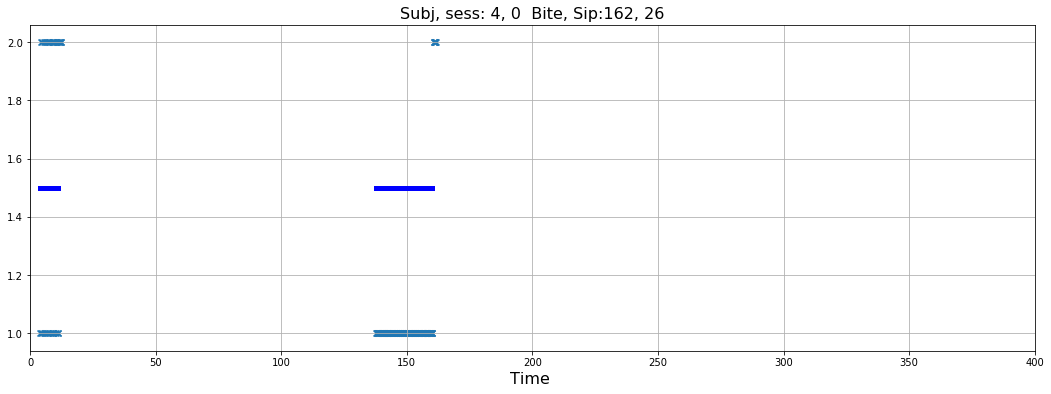

Episode count:  2
[[  6.70416667  23.73958333  42.        ]
 [326.39583333 337.02916667  17.        ]]


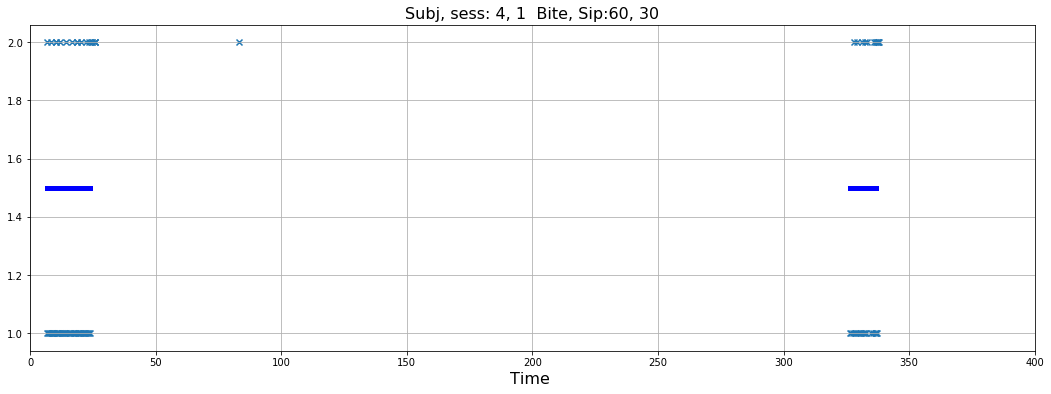

Episode count:  3
[[  8.28333333  30.9375      68.        ]
 [115.35625    120.57291667   7.        ]
 [220.16458333 228.42395833  23.        ]]


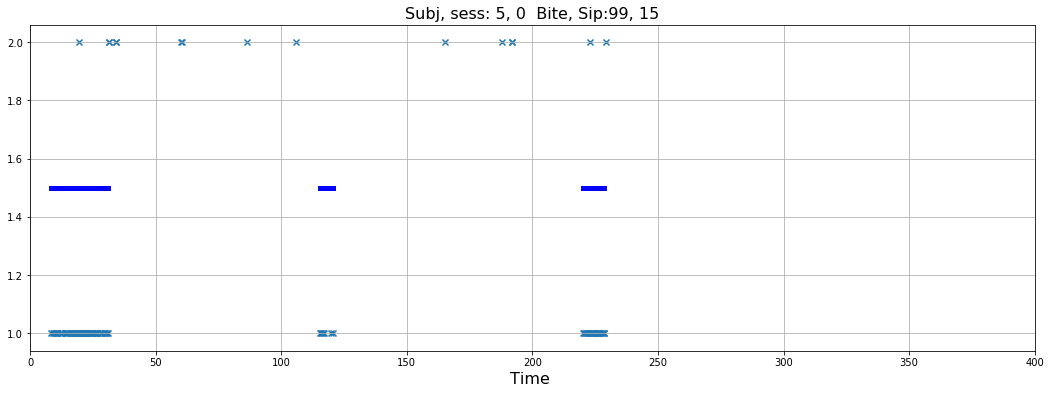

Episode count:  4
[[ 61.58854167  67.05625     15.        ]
 [188.35104167 208.78854167  42.        ]
 [214.478125   221.00416667   4.        ]
 [357.97395833 363.703125    22.        ]]


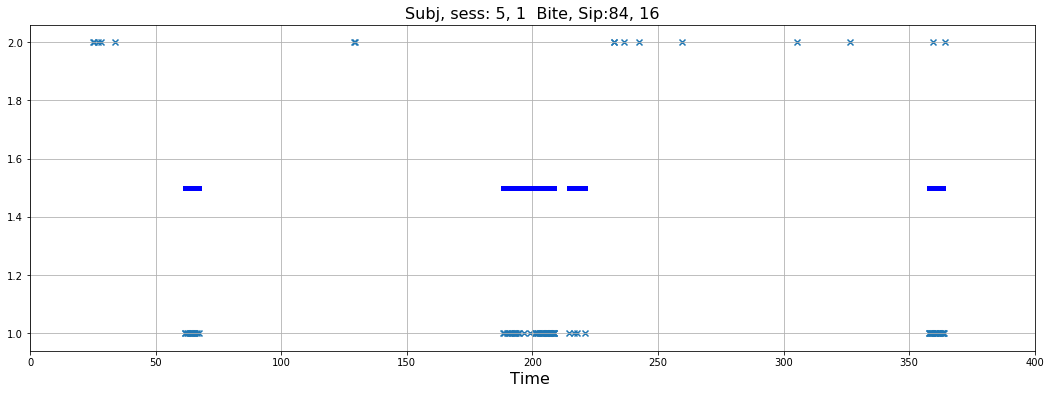

Episode count:  2
[[  4.790625     7.96666667  19.        ]
 [116.9875     123.76770833  14.        ]]


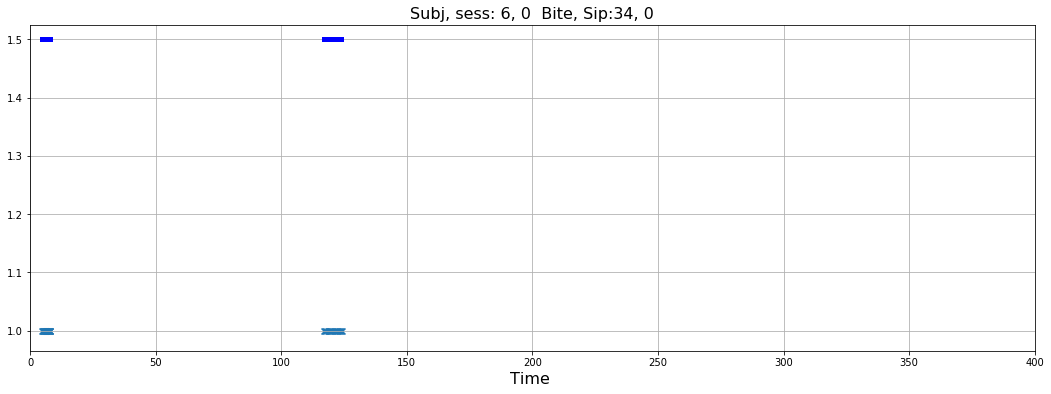

Episode count:  2
[[  4.54270833  11.56979167  31.        ]
 [178.14583333 188.80520833  47.        ]]


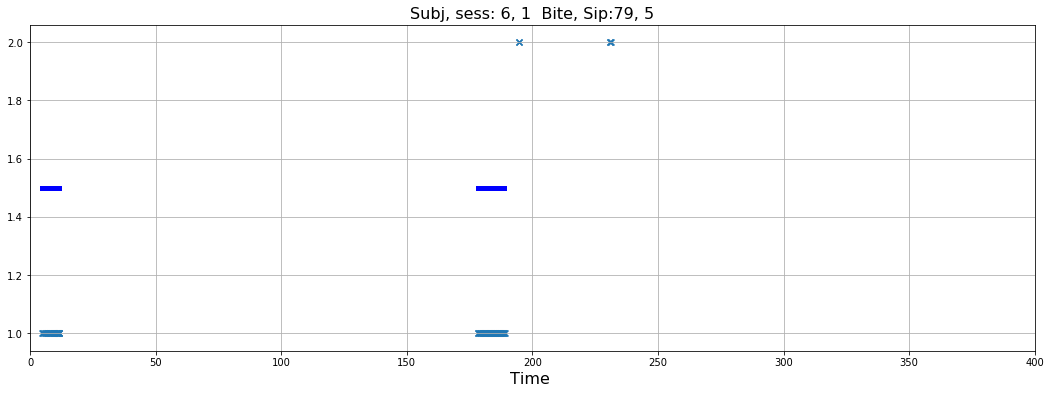

[[0.00000e+00 0.00000e+00 8.96600e+03 1.63800e+04 1.90000e+01]
 [0.00000e+00 0.00000e+00 1.61754e+05 1.94104e+05 6.50000e+01]
 [0.00000e+00 0.00000e+00 3.18713e+05 3.21784e+05 1.20000e+01]
 [0.00000e+00 1.00000e+00 7.45200e+03 2.73200e+04 9.20000e+01]
 [0.00000e+00 1.00000e+00 3.51580e+04 5.26880e+04 5.60000e+01]
 [0.00000e+00 1.00000e+00 1.69231e+05 1.93981e+05 8.60000e+01]
 [0.00000e+00 1.00000e+00 2.06311e+05 2.07657e+05 2.00000e+00]
 [0.00000e+00 1.00000e+00 2.18708e+05 2.25546e+05 1.20000e+01]
 [0.00000e+00 1.00000e+00 3.56242e+05 3.70418e+05 7.10000e+01]
 [1.00000e+00 0.00000e+00 1.51412e+05 1.64847e+05 3.10000e+01]
 [2.00000e+00 0.00000e+00 9.10800e+03 1.48410e+04 3.20000e+01]
 [2.00000e+00 0.00000e+00 1.63061e+05 1.78768e+05 9.90000e+01]
 [2.00000e+00 1.00000e+00 4.98200e+03 8.35200e+03 2.30000e+01]
 [2.00000e+00 1.00000e+00 9.66580e+04 9.66580e+04 1.00000e+00]
 [2.00000e+00 1.00000e+00 3.23584e+05 3.25003e+05 8.00000e+00]
 [3.00000e+00 0.00000e+00 5.64400e+03 6.35200e+03 2.000

In [6]:
episodes = np.zeros((0, 5))
for subj in range(len(annots)):
    for sess in range(len(annots[subj])):
        a = annots[subj][sess]      
        t = a[:,0]/(16*60)
        b= a[:,2]
        
        c = get_episodes(a)
        ssc = mdpu.add_subj_sess_to_array(c, subj, sess)
        episodes = np.concatenate((episodes, ssc))
        c[:,0:2] = c[:,0:2]/16/60
        print("Episode count: ", len(c))
        print(c)
        
        
        fig = plt.figure(figsize=(18,6))
        ax = plt.subplot(111)  

        ax.scatter(t, b, marker='x')
        for i in range(len(c)):            
            ax.plot([c[i, 0], c[i, 1]] , [1.5, 1.5] , linewidth=5, color='blue')
            
        
        plt.title("Subj, sess: {}, {}  Bite, Sip:{}, {}".format(subj, sess, np.sum(b==1), np.sum(b==2)), fontsize=16)
        plt.xlabel("Time ", fontsize=16)        
        #plt.ylabel("Rate (%)", fontsize=16)            
        #plt.legend(fontsize=16)
        plt.xlim([0, 400])
        plt.grid(True)
        plt.show()
mfileu.write_file('data', 'lab_episodes_steven_right.pkl', episodes)
print(episodes)
print(len(episodes), len(episodes)/13)
